In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

In [3]:
y.shape

(400,)

In [4]:
X.shape

(400, 2)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=4)

In [6]:
X_test.shape

(100, 2)

In [7]:
X_train.shape

(300, 2)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
X_test.shape

(100, 2)

In [10]:
X_train.shape

(300, 2)

In [11]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression(random_state=0)
regression.fit(X_train,y_train)


LogisticRegression(random_state=0)

In [12]:
print(regression.predict(sc.transform([[30,87000]])))

[0]


In [13]:
y_pred = regression.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [34]:
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis=1))


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)
print(accuracy_score(y_pred,y_test))

[[62  6]
 [ 8 24]]
0.86


#Visualizing the logistic regression on test set results

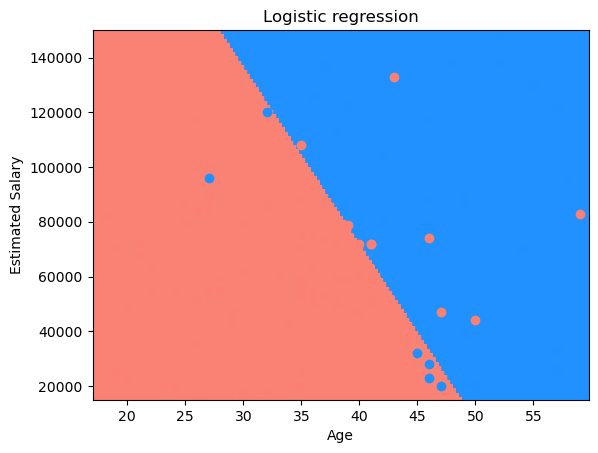

In [58]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1,X2 = np.meshgrid(
    np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() +1, step=0.25),
    np.arange(start=X_set[:,1].min() - 1, stop=X_set[:,1].max() +1, step=0.25)
)
#Predict for each point on the grid
Z = regression.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape)
#plot the decision boundary
plt.contourf(X1,X2,Z,alpha=0.75,cmap=ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

#define colors for scatter plot
colors=['#FA8072', '#1E90FF']

#plot the test set points
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],color=colors[i],label=j)

plt.title('Logistic regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

visualizing the logistic classficatio on training set 

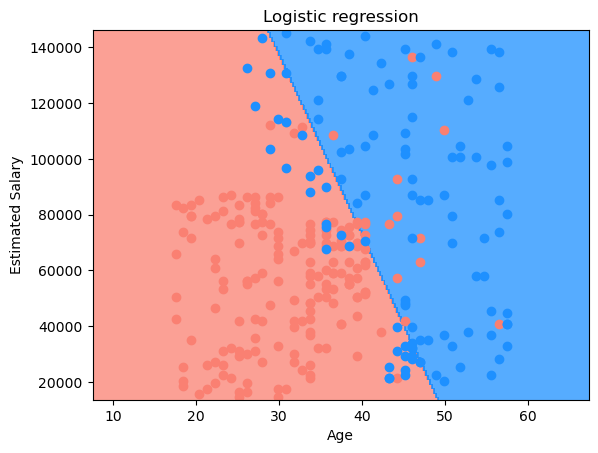

In [68]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X3,X4 = np.meshgrid(
    np.arange(start=X_set[:,0].min() - 10, stop=X_set[:,0].max() +10, step=0.25),
    np.arange(start=X_set[:,1].min() - 1000, stop=X_set[:,1].max() +1000, step=0.25)
)
#Predict for each point on the grid
Z = regression.predict(sc.transform(np.array([X3.ravel(),X4.ravel()]).T)).reshape(X3.shape)
#plot the decision boundary
plt.contourf(X3,X4,Z,alpha=0.75,cmap=ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X3.min(),X3.max())
plt.ylim(X4.min(),X4.max())

#define colors for scatter plot
colors=['#FA8072', '#1E90FF']

#plot the test set points
for i,j in enumerate(np.unique(y_train)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],color=colors[i],label=j)

plt.title('Logistic regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()